In [113]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [114]:
train_data = pd.read_csv('data/diabetes.csv')

In [115]:
train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [116]:
train_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [117]:
features = list(train_data)
print('Count of missed values\n')
for it in features[:-1]:
    print(it,':', train_data[it].loc[train_data[it] == 0].count())

Count of missed values

Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0


In [118]:
for it in features[:-1]:
    train_data[it].loc[train_data[it] == 0] = None
mode_values = train_data.mean()[:-1]
mode_values

c:\users\zanzi\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Pregnancies                   4.494673
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
dtype: float64

In [123]:
for it in features[:-1]:
    train_data[it].loc[train_data[it].isnull()] = mode_values[it]

c:\users\zanzi\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [124]:
print('Count of missed values\n')
train_data.isnull().sum()

Count of missed values



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [127]:
train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1


In [128]:
train_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,2.975395,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,4.494673,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [129]:
train_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.154290,0.259117,0.131819,0.068077,0.110590,-0.005658,0.511662,0.248263
Glucose,0.154290,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.259117,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.131819,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.068077,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.110590,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.005658,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.511662,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.248263,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


In [130]:
X = train_data.drop(columns=['Outcome'], axis=1)

In [131]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0


In [132]:
y = train_data.Outcome

In [133]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [137]:
rf_clf = RandomForestClassifier()

In [138]:
params = {'n_estimators':range(1,100,10),
          'max_depth':range(2,15,2),
          'min_samples_leaf':range(2,30,5),
          'min_samples_split':range(2,30,5),
          "criterion":['gini', 'entropy']}

In [139]:
grid_search_cv = RandomizedSearchCV(rf_clf, params, cv=5)

In [140]:
grid_search_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 15, 2),
                                        'min_samples_leaf': range(2, 30, 5),
                                        'min_samples_split': range(2, 30, 5),
                                        'n_estimators': range(1, 100, 10)})

In [141]:
best_clf = grid_search_cv.best_estimator_

In [142]:
best_clf.score(X_test, y_test)

0.7916666666666666

In [143]:
from sklearn.metrics import precision_score, recall_score

In [144]:
prediction_proba = best_clf.predict_proba(X_test)

(array([28., 26., 25., 20., 12., 25., 18., 12., 11., 15.]),
 array([0.02434575, 0.09816621, 0.17198667, 0.24580713, 0.31962759,
        0.39344805, 0.46726851, 0.54108898, 0.61490944, 0.6887299 ,
        0.76255036]),
 <BarContainer object of 10 artists>)

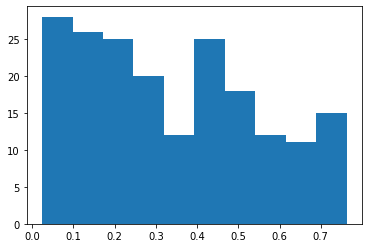

In [145]:
plt.hist(prediction_proba[:, 1])

In [146]:
prediction = best_clf.predict(X_test)

In [147]:
def calc_metrics(prediction):
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1_metric = 2*precision*recall / (precision + recall)
    print('precision:',precision,'\n','recall:',recall, '\n', 'F1:', f1_metric)

In [148]:
calc_metrics(prediction)

precision: 0.7391304347826086 
 recall: 0.5483870967741935 
 F1: 0.6296296296296297


В задании необходимо определить болен ли человек диабетом, то есть в нашем случае стоит оптимизировать метрику recall, так как лучше если не выявить заболевание опаснее чем выявить его ошибочно

In [157]:
prediction = np.where(prediction_proba[:,1] > 0.35, 1, 0)

In [158]:
calc_metrics(prediction)

precision: 0.5555555555555556 
 recall: 0.8064516129032258 
 F1: 0.6578947368421053


Оптимизируя метрику recall, так же удалось улучшить значение f1 метрики